In [1]:
# Import required packages. 
import sklearn
import re
import pandas as pd

income_data = pd.read_csv("D:/Study Material/Machine Learning/Family Income and Expenditure.csv/Family Income and Expenditure.csv")
income_data.head()


,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [2]:
# Paper : Section-3.1 - Methodology
# Number of columns and rows in the dataset
income_data.shape
# Number of missing values and type of data
income_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [4]:
# Paper : Section-3.1 - Methodology
# Household Head Occupation and  Household Head Class of Worker 
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = "most_frequent")
income_data['Household Head Occupation'] = imp.fit_transform(income_data[['Household Head Occupation']])
income_data['Household Head Class of Worker'] = imp.fit_transform(income_data[['Household Head Class of Worker']])
print(income_data.isnull().sum())

Total Household Income                           0
Region                                           0
Total Food Expenditure                           0
Main Source of Income                            0
Agricultural Household indicator                 0
Bread and Cereals Expenditure                    0
Total Rice Expenditure                           0
Meat Expenditure                                 0
Total Fish and  marine products Expenditure      0
Fruit Expenditure                                0
Vegetables Expenditure                           0
Restaurant and hotels Expenditure                0
Alcoholic Beverages Expenditure                  0
Tobacco Expenditure                              0
Clothing, Footwear and Other Wear Expenditure    0
Housing and water Expenditure                    0
Imputed House Rental Value                       0
Medical Care Expenditure                         0
Transportation Expenditure                       0
Communication Expenditure      

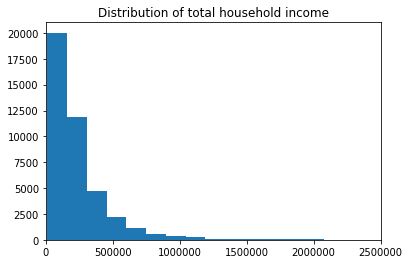

In [3]:
import matplotlib 
import matplotlib.pyplot as plt 
import numpy as np
plt.hist(income_data['Total Household Income'], 80) 
plt.xlim(0,2500000) 
plt.title("Distribution of total household income") 
plt.show()

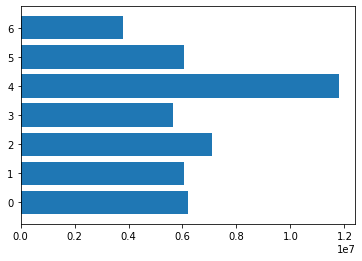

In [16]:

# Create bar 
plt.barh(income_data['Number of Personal Computer'],income_data['Total Household Income'])
 
# Show graphic 
plt.show()

  

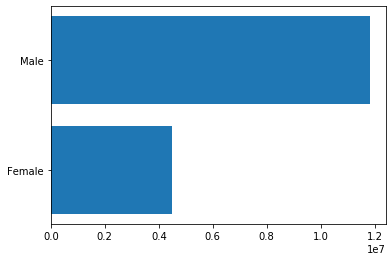

In [35]:
 # Create bar 
plt.barh(income_data['Household Head Sex'],income_data['Total Household Income'])
 
# Show graphic 
plt.show()


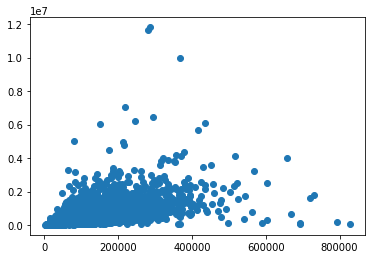

In [36]:
# Scatterplot
plt.scatter(income_data['Total Food Expenditure'],income_data['Total Household Income'])
plt.show()

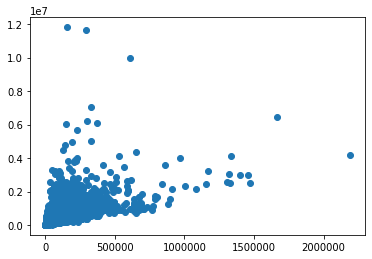

In [37]:

# Scatterplot
plt.scatter(income_data['Housing and water Expenditure'],income_data['Total Household Income'])
plt.show()

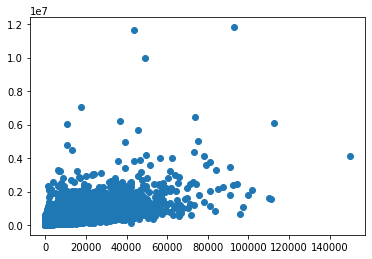

In [15]:
# Scatterplot
plt.scatter(income_data['Communication Expenditure'],income_data['Total Household Income'])
plt.show()

In [5]:
# Paper : Section-3.1 - Methodology 
# Handling categorical values
from sklearn.preprocessing import OrdinalEncoder
categ_data = income_data.select_dtypes(include=['object'])
enc = OrdinalEncoder()
categ_data1 = enc.fit_transform(categ_data)
categ_data = pd.DataFrame(categ_data1 ,columns = categ_data.columns)
categ_data.shape


(41544, 15)

In [6]:
# Paper : Section-3.1 - Methodology
# Scaling the data - Normalisation
from sklearn import preprocessing
numerical_data = income_data.select_dtypes(include=['int64'])
scalingObj= preprocessing.MinMaxScaler()
x = scalingObj.fit_transform(numerical_data)
x1 = scalingObj.fit_transform(categ_data)
numerical_data = pd.DataFrame(x,columns = numerical_data.columns)
categ_data = pd.DataFrame(x1,columns = categ_data.columns)
numerical_data
df = pd.concat([numerical_data,categ_data], axis=1, sort=False)
df.head()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Type of Building/House,Type of Roof,Type of Walls,Tenure Status,Toilet Facilities,Main Source of Water Supply
0,0.039734,0.139338,0.0,0.055023,0.050506,0.094339,0.089295,0.012145,0.179947,0.004136,...,1.0,0.326260,0.333333,0.0,1.0,1.0,0.8,0.571429,1.000000,0.3
1,0.015837,0.078605,0.0,0.022627,0.017154,0.066652,0.058834,0.007433,0.104719,0.003254,...,1.0,0.938992,0.500000,0.5,1.0,1.0,0.8,0.571429,1.000000,0.3
2,0.006057,0.071138,0.5,0.044632,0.042200,0.029755,0.013761,0.006319,0.050735,0.006266,...,1.0,0.273210,0.500000,0.5,1.0,0.0,0.0,0.571429,0.857143,0.7
3,0.008158,0.091245,0.0,0.044433,0.037792,0.041726,0.057447,0.002520,0.105441,0.008659,...,1.0,0.761273,0.000000,0.5,1.0,0.0,0.0,0.571429,0.000000,0.3
4,0.015082,0.111176,0.0,0.045465,0.039781,0.070311,0.060088,0.005096,0.150535,0.008824,...,1.0,0.339523,0.166667,0.5,1.0,0.0,0.4,0.571429,1.000000,0.3


In [9]:
# Paper : Section-2.1 - Research
# Univariate Feature Selection
from sklearn.feature_selection import  SelectKBest
from sklearn.feature_selection import f_regression
X = df.iloc[0:41544,1:60]
y = df['Total Household Income']
selector =  SelectKBest(f_regression, k=20)
selector.fit(X,y)
dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(X.columns)

#Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Columns','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score')) 

                                          Columns         Score
16                      Communication Expenditure  42262.553936
12                  Housing and water Expenditure  34994.642705
18   Miscellaneous Goods and Services Expenditure  33165.794473
0                          Total Food Expenditure  32699.075869
15                     Transportation Expenditure  28811.131661
11  Clothing, Footwear and Other Wear Expenditure  24108.582187
13                     Imputed House Rental Value  20422.171591
4                                Meat Expenditure  19697.797600
21   Total Income from Entrepreneurial Acitivites  19344.552663
40                    Number of Personal Computer  18740.182133
36                       Number of Airconditioner  18204.620487
37                       Number of Car, Jeep, Van  17705.561788
8               Restaurant and hotels Expenditure  14604.713178
39                       Number of Cellular phone  12992.777322
31                           Number of T

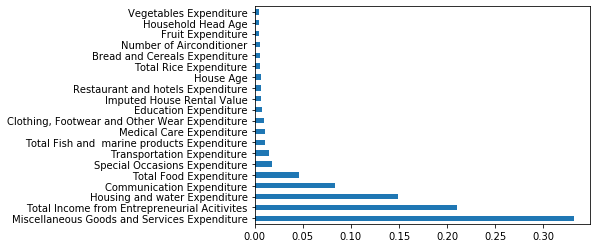

In [10]:
# Paper : Section-2.2 - Research
# Tree based faeture selection - Random forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=250, random_state=35)
forest.fit(X, y)
importances= forest.feature_importances_

#plot graph of feature importances for better visualization
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

46
[ 1  1  6  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  5  1  1  1  1  1  1  9  1  1  1  1  1  1  7  1  1  1  1  8  1  1  1
  1  1 11  1  4 14 10 13  3  2 12]
[ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True False  True  True  True
  True  True  True False  True  True  True  True False  True  True  True
  True  True False  True False False False False False False False]


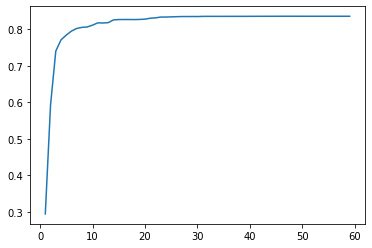

In [11]:
# Paper : Section-2.3 - Research
# Greedy Feature Selection - RFE 
from sklearn import model_selection
from sklearn.feature_selection import RFECV
from sklearn import linear_model 

# Build a classification task using 3 informative features
estimator = linear_model.LinearRegression()
rfecv= RFECV(estimator, cv=10)
rfecv.fit(X, y)

# optimal number of features
print (rfecv.n_features_)

# Ranking of each feature
print (rfecv.ranking_)
print (rfecv.support_)

# Subset of selected data
selected_features = rfecv.support_
df_selected = X.iloc[:,selected_features]

# Graph
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

[1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1]
[ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True]


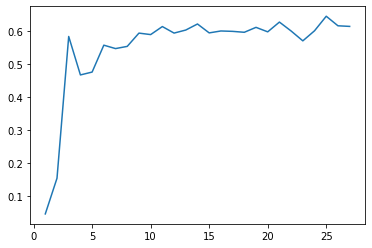

(41544, 25)


In [19]:
# Feature Selection
from sklearn.tree import DecisionTreeRegressor

# Paper : Section-2.3 - Research
# Greedy Feature Selection - RFE 
from sklearn import model_selection
from sklearn.feature_selection import RFECV
from sklearn import linear_model 

# Build a classification task using 3 informative features
estimator = DecisionTreeRegressor(random_state=35)
rfecv= RFECV(estimator, cv=10)
rfecv.fit(X, y)

# optimal number of features
print (rfecv.n_features_)

# Ranking of each feature
print (rfecv.ranking_)
print (rfecv.support_)

# Subset of selected data
selected_features = rfecv.support_
df_selected1 = X.iloc[:,selected_features]

# Graph
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()
print(df_selected1.shape)

In [17]:
# Paper : Section-3 - Methodology
# Model Building with selected 24 vaiables
from sklearn import model_selection
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor  

# Train -70% and test-30%
X = df_selected1
y = df['Total Household Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

# List of models
models = []
models.append(('Linear_Regression', LinearRegression()))
models.append(('kNN', KNeighborsRegressor(n_neighbors=6)))
models.append(('Random_Forest',RandomForestRegressor(min_samples_split=2,n_estimators=250,random_state=35)))

results = []
names = []
scoring = 'neg_root_mean_squared_error'

# Cross Validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=35,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)

print(models)


[('Linear_Regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)), ('kNN', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')), ('Random_Forest', RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=35, verbose=0, warm_start=False))]


In [18]:
# Paper : Section-4 - Methodology
# Evaluation of all models
from sklearn import metrics
# Linear Regression
linear_model = models[0][1].fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
print('Mean Absolute Error for Linear Regression:', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error for Linear Regression:', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error for Linear Regression:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4))
print('R squared score for Linear Regression:', round(metrics.r2_score(y_test,y_pred),4))

# kNN 
kNN_model = models[1][1].fit(X_train,y_train)
y_pred = kNN_model.predict(X_test)
print('Mean Absolute Error for kNN:', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error  for kNN:', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error for kNN:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4))
print('R squared score for kNN:', round(metrics.r2_score(y_test,y_pred),4))

# Random Forest
rf_model = models[2][1].fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print('Mean Absolute Error for Random Forest:', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error for Random Forest:', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error for Random Forest:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4))
print('R squared score for Random Forest:', round(metrics.r2_score(y_test,y_pred),4))

Mean Absolute Error for Linear Regression: 0.0044
Mean Squared Error for Linear Regression: 0.0001
Root Mean Squared Error for Linear Regression: 0.0087
R squared score for Linear Regression: 0.8496
Mean Absolute Error for kNN: 0.0062
Mean Squared Error  for kNN: 0.0002
Root Mean Squared Error for kNN: 0.0127
R squared score for kNN: 0.6753
Mean Absolute Error for Random Forest: 0.0041
Mean Squared Error for Random Forest: 0.0001
Root Mean Squared Error for Random Forest: 0.009
R squared score for Random Forest: 0.8393


(41544, 26)


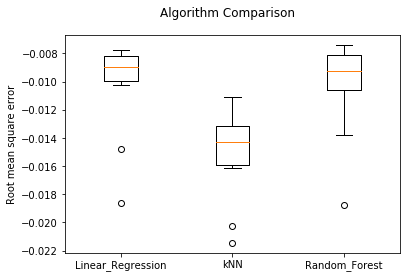

In [38]:
# Paper : Section-4 Evaluation
# Boxplot- algorithm comparison
print(X.shape)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_ylabel("Root mean square error")
ax.set_xticklabels(names)
plt.show()

In [39]:
# Paper : Section-4 Evaluation
# Building models for selected 46 values.

# Train -70% and test-30%
X1 = df_selected
y1 = df['Total Household Income']
print(X1.shape)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=35)

models = []

# List of Models
models.append(('Linear_Regression', LinearRegression()))
models.append(('kNN', KNeighborsRegressor(n_neighbors=6)))
models.append(('Random_Forest',RandomForestRegressor(n_estimators=250,random_state=35)))

results1 = []
names1 = []
scoring = 'neg_root_mean_squared_error'

# Cross Validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=35,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X1_train, y1_train, cv=kfold, scoring=scoring)
    results1.append(cv_results)
    names1.append(name)


(41544, 24)


In [40]:
# Paper : Section-3 Methodology
# Evaluation of all models
from sklearn import metrics

# Linear Regression
linear_model = models[0][1].fit(X1_train,y1_train)
y1_pred = linear_model.predict(X1_test)
print('Mean Absolute Error for Linear Regression:', round(metrics.mean_absolute_error(y1_test, y1_pred),4))
print('Mean Squared Error for Linear Regression:', round(metrics.mean_squared_error(y1_test, y1_pred),4))  
print('Root Mean Squared Error for Linear Regression:', round(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)),4))
print('R squared score for Linear Regression:', round(metrics.r2_score(y1_test,y1_pred),4))

# kNN 
kNN_model = models[1][1].fit(X1_train,y1_train)
y1_pred = kNN_model.predict(X1_test)
print('Mean Absolute Error for kNN:', round(metrics.mean_absolute_error(y1_test, y1_pred),4))  
print('Mean Squared Error  for kNN:', round(metrics.mean_squared_error(y1_test, y1_pred),4))  
print('Root Mean Squared Error for kNN:', round(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)),4))
print('R squared score for kNN:', round(metrics.r2_score(y1_test,y1_pred),4))

# Random Forest
rf_model = models[2][1].fit(X1_train,y1_train)
y1_pred = rf_model.predict(X1_test)
print('Mean Absolute Error for Random Forest:', round(metrics.mean_absolute_error(y1_test, y1_pred),4))  
print('Mean Squared Error for Random Forest:', round(metrics.mean_squared_error(y1_test, y1_pred),4))  
print('Root Mean Squared Error for Random Forest:', round(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)),4))
print('R squared score for Random Forest:', round(metrics.r2_score(y1_test,y1_pred),4))


Mean Absolute Error for Linear Regression: 0.0044
Mean Squared Error for Linear Regression: 0.0001
Root Mean Squared Error for Linear Regression: 0.0087
R squared score for Linear Regression: 0.8494
Mean Absolute Error for kNN: 0.0061
Mean Squared Error  for kNN: 0.0002
Root Mean Squared Error for kNN: 0.0125
R squared score for kNN: 0.6862
Mean Absolute Error for Random Forest: 0.0041
Mean Squared Error for Random Forest: 0.0001
Root Mean Squared Error for Random Forest: 0.0089
R squared score for Random Forest: 0.8419


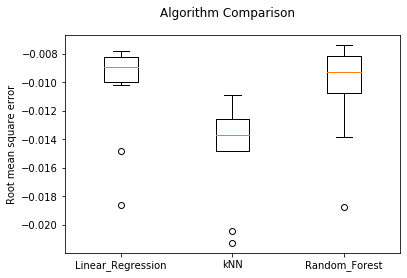

In [42]:
# Paper : Section-4 Evaluation
# Boxplot- algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_ylabel("Root mean square error")
ax.set_xticklabels(names1)
plt.show()